## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [2]:
import random
from scipy import ndarray

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
palette = ['paleturquoise','c']

## Import dataset

In [5]:
from collections import Counter
from imblearn.datasets import fetch_datasets
data = fetch_datasets()['scene']

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [6]:
data.data.shape

(2407, 294)

In [7]:
len(data.data)

2407

In [8]:
def unison_shuffled_copies(a, b):
    np.random.seed(1)##change seed 1,2,3,4,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [9]:
data.data,data.target=unison_shuffled_copies(data.data, data.target)

## Initializing Results list

## Creating label and feature matrices

In [10]:
labels=data.target
print(np.unique(labels, return_counts = 1))

(array([-1,  1], dtype=int64), array([2230,  177], dtype=int64))


In [11]:
features=data.data
features.shape

(2407, 294)

In [12]:
n_feat=len(features[1])

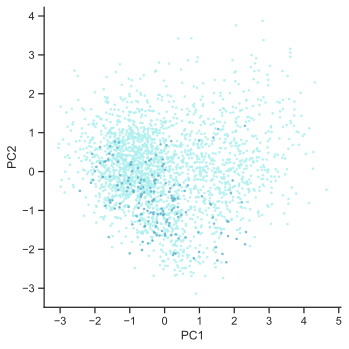

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

177

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == -1)[0]
label_0=list(label_0)
len(label_0)

2230

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//10
b=len(features_0)//10

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_4_min=features_1[3*a:4*a]
fold_4_maj=features_0[3*b:4*b]
fold_4_tst=np.concatenate((fold_4_min,fold_4_maj))
lab_4_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [23]:
fold_5_min=features_1[4*a:5*a]
fold_5_maj=features_0[4*b:5*b]
fold_5_tst=np.concatenate((fold_5_min,fold_5_maj))
lab_5_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [24]:
fold_6_min=features_1[5*a:6*a]
fold_6_maj=features_0[5*b:6*b]
fold_6_tst=np.concatenate((fold_6_min,fold_6_maj))
lab_6_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [25]:
fold_7_min=features_1[6*a:7*a]
fold_7_maj=features_0[6*b:7*b]
fold_7_tst=np.concatenate((fold_7_min,fold_7_maj))
lab_7_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [26]:
fold_8_min=features_1[7*a:8*a]
fold_8_maj=features_0[7*b:8*b]
fold_8_tst=np.concatenate((fold_8_min,fold_8_maj))
lab_8_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [27]:
fold_9_min=features_1[8*a:9*a]
fold_9_maj=features_0[8*b:9*b]
fold_9_tst=np.concatenate((fold_9_min,fold_9_maj))
lab_9_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [28]:
fold_10_min=features_1[9*a:]
fold_10_maj=features_0[9*b:]
fold_10_tst=np.concatenate((fold_10_min,fold_10_maj))
lab_10_tst=np.concatenate((np.zeros(len(fold_10_min))+1, np.zeros(len(fold_10_maj))))

In [29]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [30]:
lab_1_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [31]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_1_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [32]:
lab_2_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [33]:
fold_3_trn=np.concatenate((fold_2_min,fold_1_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_1_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [34]:
lab_3_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [35]:
fold_4_trn=np.concatenate((fold_2_min,fold_3_min,fold_1_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_1_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [36]:
lab_4_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [37]:
fold_5_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_1_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_1_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [38]:
lab_5_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [39]:
fold_6_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_1_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_1_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [40]:
lab_6_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [41]:
fold_7_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_1_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_1_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [42]:
lab_7_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [43]:
fold_8_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_1_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_1_maj,fold_9_maj,fold_10_maj))

In [44]:
lab_8_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [45]:
fold_9_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_1_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_1_maj,fold_10_maj))

In [46]:
lab_9_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [47]:
fold_10_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_1_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_1_maj))

In [48]:
lab_10_trn=np.concatenate((np.zeros(9*a)+1,np.zeros(9*b)))


In [49]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn,fold_4_trn,fold_5_trn,fold_6_trn,fold_7_trn,fold_8_trn,fold_9_trn,fold_10_trn]

In [50]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst,fold_4_tst,fold_5_tst,fold_6_tst,fold_7_tst,fold_8_tst,fold_9_tst,fold_10_tst]

In [51]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn,lab_4_trn,lab_5_trn,lab_6_trn,lab_7_trn,lab_8_trn,lab_9_trn,lab_10_trn]

In [52]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst,lab_4_tst,lab_5_tst,lab_6_tst,lab_7_tst,lab_8_tst,lab_9_tst,lab_10_tst]

In [53]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [54]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [55]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [56]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [57]:
import smote_variants as sv
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE 

In [58]:
def OVS(training_data,training_labels,neb):
    
    smote_mot2ld = sv.MOT2LD(random_state=62, k = neb)
    SMOTE_feat_mot2ld, SMOTE_labels_mot2ld = smote_mot2ld.sample(training_data, training_labels)
    
    smote_dbsmote = sv.DBSMOTE(random_state=62, )
    SMOTE_feat_dbsmote, SMOTE_labels_dbsmote = smote_dbsmote.sample(training_data, training_labels)
    
    smote_cure = sv.CURE_SMOTE(random_state=62, )
    SMOTE_feat_cure, SMOTE_labels_cure = smote_cure.sample(training_data, training_labels)
    
    smote_SOMO = sv.SOMO(random_state=62)
    SMOTE_feat_SOMO, SMOTE_labels_SOMO = smote_SOMO.sample(training_data, training_labels)
    
    sm = SMOTE(random_state=62, k_neighbors=neb, sampling_strategy=1)
    SMOTE_feat, SMOTE_labels = sm.fit_resample(training_data,training_labels)
    
    
    return(SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote,\
          SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO)

In [59]:
LR=[]
LR_SM=[]
LR_MOT2TLD=[]
LR_DBSMOTE=[]
LR_CURE=[]
LR_SOMO=[]



i=0
while i<10:
    SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote, SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO=OVS(training_folds_feats[i],training_folds_labels[i],30)
    
    f1_lr, bal_acc_lr, aps_lr, mat_lr=lr(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    LR.append([f1_lr, aps_lr, bal_acc_lr])
    
    f1_lr_SMOTE,bal_acc_lr_SMOTE, aps_lr_SMOTE, mat_lr_SMOTE=lr(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_SM.append([f1_lr_SMOTE, bal_acc_lr_SMOTE, aps_lr_SMOTE])
        
    f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld, mat_lr_SMOTE_mot2ld=lr(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    LR_MOT2TLD.append([f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld])
    
    f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote, mat_lr_SMOTE_dbsmote=lr(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    LR_DBSMOTE.append([f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote])
    
    f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure,mat_lr_SMOTE_cure=lr(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    LR_CURE.append([f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure])
    
    f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO,mat_lr_SMOTE_SOMO=lr(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    LR_SOMO.append([f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO])
    
    i=i+1

2020-11-13 13:06:42,933:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:06:42,935:INFO:MOT2LD: starting TSNE n: 2167 d: 294


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.253s...
[t-SNE] Computed neighbors for 2167 samples in 5.527s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.681718
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 92.3287430, gradient norm = 0.2039293 (50 iterations in 1.666s)
[t-SNE] Iteration 100: error = 90.5522232, gradient norm = 0.2058689 (50 iterations in 1.656s)
[t-SNE] Iteration 150: error = 90.2792664, gradient norm = 0.1972532 (50 iterations in 1.550s)
[t-SNE] Iteration 200: error = 91.1179276, gradient norm = 0.1728157 (50 iterations in 1.407s)
[t-SNE] Iteration 250: error = 90.0920410, gradient norm = 0.2128723 (50 iterations in 1.430s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.092041
[t-SNE] Iteration 300: erro

2020-11-13 13:07:02,129:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2154512, gradient norm = 0.0001694 (50 iterations in 1.157s)
[t-SNE] KL divergence after 500 iterations: 2.215451


2020-11-13 13:07:02,645:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:02,740:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:07:02,741:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE7C762EF8>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:03,186:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 212 11 15 2
balanced accuracy_LR: 0.5341598522817198
f1 score_LR: 0.13333333333333333
kappa: 0.07664989641905884
average_precision_score: 0.17114731296244648
confusion matrix_LR [[212  11]
 [ 15   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 9 8
balanced accuracy_LR: 0.6500923239250858
f1 score_LR: 0.25396825396825395
kappa: 0.16789613455296548
average_precision_score: 0.1832170179919752
confusion matrix_LR [[185  38]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 184 39 11 6
balanced accuracy_LR: 0.5890266420469533
f1 score_LR: 0.19354838709677416
kappa: 0.101123595505618
average_precision_score: 0.14613133056705652
confusion matrix_LR [[184  39]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 207 16 14 3
balanced accuracy_LR: 0.5523608546557637
f1 score_LR: 0.16666666666666669
kappa: 0.09932449337002747
average_precision_score: 0.17852598502825878
confusion matrix_LR [[207  16]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 8 9
balanced accuracy_LR: 0.679504088630968
f1 score_LR: 0.28125
kappa: 0.19779101874727512
average_precision_score: 0.20287219151201133
confusion matrix_LR [[185  38]
 [  8   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:07:08,425:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:07:08,427:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 212 11 15 2
balanced accuracy_LR: 0.5341598522817198
f1 score_LR: 0.13333333333333333
kappa: 0.07664989641905884
average_precision_score: 0.17114731296244648
confusion matrix_LR [[212  11]
 [ 15   2]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.401s...
[t-SNE] Computed neighbors for 2167 samples in 8.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.686873
[t-SNE] Computed conditional probabilities in 0.097s
[t-SNE] Iteration 50: error = 91.9526443, gradient norm = 0.2414501 (50 iterations in 1.772s)
[t-SNE] Iteration 100: error = 91.4734879, gradient norm = 0.1812894 (50 iterations in 1.503s)
[t-SNE] Iteration 150: error = 91.3916016, gradient norm = 0.1885068 (50 iterations in 1.365s)
[t-SNE] Iteration 200: error = 91.0707474, gradient norm = 0.1885860 (50 itera

2020-11-13 13:07:30,069:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2320125, gradient norm = 0.0001908 (50 iterations in 1.006s)
[t-SNE] KL divergence after 500 iterations: 2.232013


2020-11-13 13:07:30,481:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:30,598:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:07:30,606:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE02C89D18>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:30,959:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 215 8 17 0
balanced accuracy_LR: 0.4820627802690583
f1 score_LR: 0.0
kappa: -0.04748603351955305
average_precision_score: 0.12106197323198818
confusion matrix_LR [[215   8]
 [ 17   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 187 36 11 6
balanced accuracy_LR: 0.5957530994460565
f1 score_LR: 0.20338983050847456
kappa: 0.11404335532516485
average_precision_score: 0.11090785832441374
confusion matrix_LR [[187  36]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 195 28 12 5
balanced accuracy_LR: 0.5842785544711158
f1 score_LR: 0.19999999999999998
kappa: 0.11748483177054614
average_precision_score: 0.14661343165177249
confusion matrix_LR [[195  28]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 213 10 17 0
balanced accuracy_LR: 0.47757847533632286
f1 score_LR: 0.0
kappa: -0.055374592833876024
average_precision_score: 0.09988170083091459
confusion matrix_LR [[213  10]
 [ 17   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 195 28 14 3
balanced accuracy_LR: 0.525455025059351
f1 score_LR: 0.125
kappa: 0.03688133002102045
average_precision_score: 0.10687926836577419
confusion matrix_LR [[195  28]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:07:34,624:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:07:34,624:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 215 8 17 0
balanced accuracy_LR: 0.4820627802690583
f1 score_LR: 0.0
kappa: -0.04748603351955305
average_precision_score: 0.12106197323198818
confusion matrix_LR [[215   8]
 [ 17   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.295s...
[t-SNE] Computed neighbors for 2167 samples in 6.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.686588
[t-SNE] Computed conditional probabilities in 0.088s
[t-SNE] Iteration 50: error = 92.3263168, gradient norm = 0.2146020 (50 iterations in 1.555s)
[t-SNE] Iteration 100: error = 91.1893845, gradient norm = 0.1872012 (50 iterations in 1.526s)
[t-SNE] Iteration 150: error = 91.8908615, gradient norm = 0.1910938 (50 iterations in 1.683s)
[t-SNE] Iteration 200: error = 92.1913376, gradient norm = 0.1800814 (50 iterations in 1.477s)

2020-11-13 13:07:54,290:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2186136, gradient norm = 0.0001851 (50 iterations in 0.897s)
[t-SNE] KL divergence after 500 iterations: 2.218614


2020-11-13 13:07:54,866:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:54,983:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:07:54,999:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE7C7C6278>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:55,453:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 209 14 11 6
balanced accuracy_LR: 0.6450804537061462
f1 score_LR: 0.3243243243243243
kappa: 0.2682926829268292
average_precision_score: 0.2799604931260235
confusion matrix_LR [[209  14]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 175 48 8 9
balanced accuracy_LR: 0.657082563967291
f1 score_LR: 0.24324324324324326
kappa: 0.15054986727341668
average_precision_score: 0.23631799989902935
confusion matrix_LR [[175  48]
 [  8   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 184 39 7 10
balanced accuracy_LR: 0.7066737008704828
f1 score_LR: 0.30303030303030304
kappa: 0.22110907295047277
average_precision_score: 0.24746762904750577
confusion matrix_LR [[184  39]
 [  7  10]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 210 13 11 6
balanced accuracy_LR: 0.6473226061725139
f1 score_LR: 0.33333333333333337
kappa: 0.279459594696022
average_precision_score: 0.31810131640437067
confusion matrix_LR [[210  13]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 181 42 9 8
balanced accuracy_LR: 0.6411237140596149
f1 score_LR: 0.23880597014925375
kappa: 0.1488178025034771
average_precision_score: 0.2432252293305215
confusion matrix_LR [[181  42]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:07:59,110:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:07:59,110:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 209 14 11 6
balanced accuracy_LR: 0.6450804537061462
f1 score_LR: 0.3243243243243243
kappa: 0.2682926829268292
average_precision_score: 0.2799604931260235
confusion matrix_LR [[209  14]
 [ 11   6]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.306s...
[t-SNE] Computed neighbors for 2167 samples in 6.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.680663
[t-SNE] Computed conditional probabilities in 0.093s
[t-SNE] Iteration 50: error = 94.6012115, gradient norm = 0.1960651 (50 iterations in 1.693s)
[t-SNE] Iteration 100: error = 91.2826385, gradient norm = 0.2053559 (50 iterations in 1.398s)
[t-SNE] Iteration 150: error = 92.1090317, gradient norm = 0.1887139 (50 iterations in 1.444s)
[t-SNE] Iteration 200: error = 91.8617859, gradient norm = 0.1796829 (50 iteratio

2020-11-13 13:08:18,199:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2334080, gradient norm = 0.0001767 (50 iterations in 0.980s)
[t-SNE] KL divergence after 500 iterations: 2.233408


2020-11-13 13:08:18,616:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:08:18,710:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:08:18,728:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE02CB83B8>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:08:19,075:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 209 14 14 3
balanced accuracy_LR: 0.5568451595884991
f1 score_LR: 0.17647058823529413
kappa: 0.11369031917699812
average_precision_score: 0.19384325790708407
confusion matrix_LR [[209  14]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 181 42 8 9
balanced accuracy_LR: 0.6705354787654972
f1 score_LR: 0.2647058823529412
kappa: 0.17729329494035384
average_precision_score: 0.2019512015836915
confusion matrix_LR [[181  42]
 [  8   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 192 31 9 8
balanced accuracy_LR: 0.6657873911896597
f1 score_LR: 0.28571428571428564
kappa: 0.20752847944526986
average_precision_score: 0.15094634094826026
confusion matrix_LR [[192  31]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 204 19 14 3
balanced accuracy_LR: 0.5456343972566605
f1 score_LR: 0.15384615384615383
kappa: 0.08035299581978628
average_precision_score: 0.19833189955850844
confusion matrix_LR [[204  19]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 193 30 7 10
balanced accuracy_LR: 0.7268530730677921
f1 score_LR: 0.3508771929824561
kappa: 0.27922077922077915
average_precision_score: 0.19513901513700901
confusion matrix_LR [[193  30]
 [  7  10]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:08:22,535:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:08:22,548:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 209 14 14 3
balanced accuracy_LR: 0.5568451595884991
f1 score_LR: 0.17647058823529413
kappa: 0.11369031917699812
average_precision_score: 0.19384325790708407
confusion matrix_LR [[209  14]
 [ 14   3]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.291s...
[t-SNE] Computed neighbors for 2167 samples in 6.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.684586
[t-SNE] Computed conditional probabilities in 0.087s
[t-SNE] Iteration 50: error = 92.4098969, gradient norm = 0.2115952 (50 iterations in 1.447s)
[t-SNE] Iteration 100: error = 91.0648041, gradient norm = 0.1815057 (50 iterations in 1.410s)
[t-SNE] Iteration 150: error = 92.0766144, gradient norm = 0.1705249 (50 iterations in 1.406s)
[t-SNE] Iteration 200: error = 90.7910385, gradient norm = 0.1977564 (50 itera

2020-11-13 13:08:40,467:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2485197, gradient norm = 0.0001910 (50 iterations in 0.878s)
[t-SNE] KL divergence after 500 iterations: 2.248520


2020-11-13 13:08:40,920:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:08:41,035:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:08:41,036:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE7C7B4D68>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:08:41,390:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 210 13 11 6
balanced accuracy_LR: 0.6473226061725139
f1 score_LR: 0.33333333333333337
kappa: 0.279459594696022
average_precision_score: 0.2446352735318568
confusion matrix_LR [[210  13]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 9 8
balanced accuracy_LR: 0.6500923239250858
f1 score_LR: 0.25396825396825395
kappa: 0.16789613455296548
average_precision_score: 0.23413583023891663
confusion matrix_LR [[185  38]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 198 25 12 5
balanced accuracy_LR: 0.5910050118702189
f1 score_LR: 0.21276595744680848
kappa: 0.13450292397660824
average_precision_score: 0.1803771431572674
confusion matrix_LR [[198  25]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 209 14 11 6
balanced accuracy_LR: 0.6450804537061462
f1 score_LR: 0.3243243243243243
kappa: 0.2682926829268292
average_precision_score: 0.25940145202761133
confusion matrix_LR [[209  14]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 191 32 8 9
balanced accuracy_LR: 0.6929570034291743
f1 score_LR: 0.3103448275862069
kappa: 0.23359412422161896
average_precision_score: 0.17404821961234052
confusion matrix_LR [[191  32]
 [  8   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:08:44,896:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:08:44,896:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 210 13 11 6
balanced accuracy_LR: 0.6473226061725139
f1 score_LR: 0.33333333333333337
kappa: 0.279459594696022
average_precision_score: 0.2446352735318568
confusion matrix_LR [[210  13]
 [ 11   6]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.291s...
[t-SNE] Computed neighbors for 2167 samples in 6.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.684393
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 91.5097427, gradient norm = 0.2365395 (50 iterations in 1.789s)
[t-SNE] Iteration 100: error = 90.7278824, gradient norm = 0.2031189 (50 iterations in 1.425s)
[t-SNE] Iteration 150: error = 91.3181610, gradient norm = 0.1915712 (50 iterations in 1.302s)
[t-SNE] Iteration 200: error = 91.3461227, gradient norm = 0.1682896 (50 iteratio

2020-11-13 13:09:03,061:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2224379, gradient norm = 0.0001973 (50 iterations in 1.008s)
[t-SNE] KL divergence after 500 iterations: 2.222438


2020-11-13 13:09:03,477:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:09:03,583:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:09:03,583:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE7C788868>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:09:03,930:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 213 10 16 1
balanced accuracy_LR: 0.5069902400422052
f1 score_LR: 0.07142857142857142
kappa: 0.016703435234793673
average_precision_score: 0.15158229503640974
confusion matrix_LR [[213  10]
 [ 16   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 179 44 10 7
balanced accuracy_LR: 0.6072276444209971
f1 score_LR: 0.20588235294117646
kappa: 0.11147675853558214
average_precision_score: 0.13842925625909747
confusion matrix_LR [[179  44]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 191 32 11 6
balanced accuracy_LR: 0.6047217093115274
f1 score_LR: 0.21818181818181817
kappa: 0.13335572724219003
average_precision_score: 0.12851942505258518
confusion matrix_LR [[191  32]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 213 10 15 2
balanced accuracy_LR: 0.5364020047480875
f1 score_LR: 0.13793103448275862
kappa: 0.08424908424908417
average_precision_score: 0.14089947775155376
confusion matrix_LR [[213  10]
 [ 15   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 187 36 10 7
balanced accuracy_LR: 0.6251648641519387
f1 score_LR: 0.23333333333333336
kappa: 0.14669964445818517
average_precision_score: 0.13638788917148645
confusion matrix_LR [[187  36]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:09:07,519:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:09:07,520:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 213 10 16 1
balanced accuracy_LR: 0.5069902400422052
f1 score_LR: 0.07142857142857142
kappa: 0.016703435234793673
average_precision_score: 0.15158229503640974
confusion matrix_LR [[213  10]
 [ 16   1]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.320s...
[t-SNE] Computed neighbors for 2167 samples in 6.291s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.678560
[t-SNE] Computed conditional probabilities in 0.073s
[t-SNE] Iteration 50: error = 92.8829422, gradient norm = 0.1981130 (50 iterations in 1.498s)
[t-SNE] Iteration 100: error = 91.8849487, gradient norm = 0.1812339 (50 iterations in 1.207s)
[t-SNE] Iteration 150: error = 92.3054047, gradient norm = 0.1869680 (50 iterations in 1.833s)
[t-SNE] Iteration 200: error = 90.5628738, gradient norm = 0.2034765 (50 iter

2020-11-13 13:09:26,537:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2481074, gradient norm = 0.0001675 (50 iterations in 0.900s)
[t-SNE] KL divergence after 500 iterations: 2.248107


2020-11-13 13:09:26,975:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:09:27,082:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:09:27,082:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE02C7BF48>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:09:27,473:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 209 14 13 4
balanced accuracy_LR: 0.5862569242943815
f1 score_LR: 0.22857142857142856
kappa: 0.16795069337442226
average_precision_score: 0.167639918744106
confusion matrix_LR [[209  14]
 [ 13   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 12 5
balanced accuracy_LR: 0.5618570298074387
f1 score_LR: 0.16666666666666666
kappa: 0.07249961354150558
average_precision_score: 0.14621905360697443
confusion matrix_LR [[185  38]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 188 35 10 7
balanced accuracy_LR: 0.6274070166183066
f1 score_LR: 0.23728813559322035
kappa: 0.15174363807728553
average_precision_score: 0.1610631353660045
confusion matrix_LR [[188  35]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 203 20 12 5
balanced accuracy_LR: 0.6022157742020575
f1 score_LR: 0.2380952380952381
kappa: 0.16793066088840747
average_precision_score: 0.22481627824581138
confusion matrix_LR [[203  20]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 12 5
balanced accuracy_LR: 0.5618570298074387
f1 score_LR: 0.16666666666666666
kappa: 0.07249961354150558
average_precision_score: 0.15460113735622555
confusion matrix_LR [[185  38]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:09:30,951:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:09:30,951:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 209 14 13 4
balanced accuracy_LR: 0.5862569242943815
f1 score_LR: 0.22857142857142856
kappa: 0.16795069337442226
average_precision_score: 0.167639918744106
confusion matrix_LR [[209  14]
 [ 13   4]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.261s...
[t-SNE] Computed neighbors for 2167 samples in 6.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.684416
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 90.3448181, gradient norm = 0.2507009 (50 iterations in 1.425s)
[t-SNE] Iteration 100: error = 91.4034042, gradient norm = 0.1963399 (50 iterations in 1.243s)
[t-SNE] Iteration 150: error = 89.0947037, gradient norm = 0.2338262 (50 iterations in 1.239s)
[t-SNE] Iteration 200: error = 91.6632843, gradient norm = 0.1896589 (50 iterati

2020-11-13 13:09:48,291:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2462122, gradient norm = 0.0001692 (50 iterations in 0.950s)
[t-SNE] KL divergence after 500 iterations: 2.246212


2020-11-13 13:09:48,710:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:09:48,808:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:09:48,809:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE02CB9188>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:09:49,178:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 217 6 14 3
balanced accuracy_LR: 0.5747823793194408
f1 score_LR: 0.23076923076923078
kappa: 0.19110212335692622
average_precision_score: 0.22478023576343392
confusion matrix_LR [[217   6]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 10 7
balanced accuracy_LR: 0.6206805592192033
f1 score_LR: 0.22580645161290322
kappa: 0.13707865168539324
average_precision_score: 0.2325763005392405
confusion matrix_LR [[185  38]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 193 30 11 6
balanced accuracy_LR: 0.6092060142442627
f1 score_LR: 0.22641509433962262
kappa: 0.14405010438413368
average_precision_score: 0.19570025953475056
confusion matrix_LR [[193  30]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 216 7 14 3
balanced accuracy_LR: 0.572540226853073
f1 score_LR: 0.22222222222222224
kappa: 0.1791530944625408
average_precision_score: 0.2299955793601856
confusion matrix_LR [[216   7]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 192 31 10 7
balanced accuracy_LR: 0.6363756264837774
f1 score_LR: 0.2545454545454545
kappa: 0.1736647631844137
average_precision_score: 0.1658894775212177
confusion matrix_LR [[192  31]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:09:52,904:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:09:52,904:INFO:MOT2LD: starting TSNE n: 2167 d: 294


tn, fp, fn, tp: 217 6 14 3
balanced accuracy_LR: 0.5747823793194408
f1 score_LR: 0.23076923076923078
kappa: 0.19110212335692622
average_precision_score: 0.22478023576343392
confusion matrix_LR [[217   6]
 [ 14   3]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2167 samples in 0.298s...
[t-SNE] Computed neighbors for 2167 samples in 6.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2167
[t-SNE] Computed conditional probabilities for sample 2000 / 2167
[t-SNE] Computed conditional probabilities for sample 2167 / 2167
[t-SNE] Mean sigma: 0.682377
[t-SNE] Computed conditional probabilities in 0.072s
[t-SNE] Iteration 50: error = 93.1051788, gradient norm = 0.2089390 (50 iterations in 1.535s)
[t-SNE] Iteration 100: error = 91.4464188, gradient norm = 0.2081757 (50 iterations in 1.278s)
[t-SNE] Iteration 150: error = 90.5699463, gradient norm = 0.2178749 (50 iterations in 1.049s)
[t-SNE] Iteration 200: error = 90.2452240, gradient norm = 0.2190108 (50 iterat

2020-11-13 13:10:09,367:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2292840, gradient norm = 0.0001655 (50 iterations in 0.683s)
[t-SNE] KL divergence after 500 iterations: 2.229284


2020-11-13 13:10:09,727:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:10:09,833:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:10:09,835:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE02C7B138>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:10:10,150:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 205 18 14 3
balanced accuracy_LR: 0.5478765497230282
f1 score_LR: 0.15789473684210528
kappa: 0.08636688079942889
average_precision_score: 0.21174499857995424
confusion matrix_LR [[205  18]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 181 42 11 6
balanced accuracy_LR: 0.5823001846478502
f1 score_LR: 0.18461538461538463
kappa: 0.0893470790378007
average_precision_score: 0.17473315305703838
confusion matrix_LR [[181  42]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 181 42 10 7
balanced accuracy_LR: 0.6117119493537325
f1 score_LR: 0.21212121212121207
kappa: 0.11951460420488225
average_precision_score: 0.1966927710350783
confusion matrix_LR [[181  42]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 202 21 14 3
balanced accuracy_LR: 0.5411500923239251
f1 score_LR: 0.14634146341463414
kappa: 0.06914893617021278
average_precision_score: 0.22626794315595788
confusion matrix_LR [[202  21]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 12 5
balanced accuracy_LR: 0.5618570298074387
f1 score_LR: 0.16666666666666666
kappa: 0.07249961354150558
average_precision_score: 0.19028338678146844
confusion matrix_LR [[185  38]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:10:13,808:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:10:13,808:INFO:MOT2LD: starting TSNE n: 2160 d: 294


tn, fp, fn, tp: 205 18 14 3
balanced accuracy_LR: 0.5478765497230282
f1 score_LR: 0.15789473684210528
kappa: 0.08636688079942889
average_precision_score: 0.21174499857995424
confusion matrix_LR [[205  18]
 [ 14   3]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2160 samples in 0.303s...
[t-SNE] Computed neighbors for 2160 samples in 7.648s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2160
[t-SNE] Computed conditional probabilities for sample 2000 / 2160
[t-SNE] Computed conditional probabilities for sample 2160 / 2160
[t-SNE] Mean sigma: 0.680974
[t-SNE] Computed conditional probabilities in 0.103s
[t-SNE] Iteration 50: error = 91.5723267, gradient norm = 0.2232905 (50 iterations in 1.632s)
[t-SNE] Iteration 100: error = 91.6823959, gradient norm = 0.1782719 (50 iterations in 1.437s)
[t-SNE] Iteration 150: error = 91.2936325, gradient norm = 0.1971530 (50 iterations in 1.541s)
[t-SNE] Iteration 200: error = 92.2316360, gradient norm = 0.1925165 (50 itera

2020-11-13 13:10:35,614:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 2.2196963, gradient norm = 0.0001668 (50 iterations in 1.274s)
[t-SNE] KL divergence after 500 iterations: 2.219696


2020-11-13 13:10:36,131:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:10:36,215:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:10:36,216:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002CE02C77F98>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:10:36,586:INFO:CURE_SMOTE: Running sampling via ('CUR

tn, fp, fn, tp: 210 13 18 6
balanced accuracy_LR: 0.5958520179372198
f1 score_LR: 0.27906976744186046
kappa: 0.21135029354207435
average_precision_score: 0.22792106332702314
confusion matrix_LR [[210  13]
 [ 18   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 186 37 15 9
balanced accuracy_LR: 0.6045403587443946
f1 score_LR: 0.2571428571428572
kappa: 0.14838880785041764
average_precision_score: 0.16649196600854543
confusion matrix_LR [[186  37]
 [ 15   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 193 30 14 10
balanced accuracy_LR: 0.6410687593423019
f1 score_LR: 0.3125
kappa: 0.21745391705069117
average_precision_score: 0.19618315989119173
confusion matrix_LR [[193  30]
 [ 14  10]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 210 13 18 6
balanced accuracy_LR: 0.5958520179372198
f1 score_LR: 0.27906976744186046
kappa: 0.21135029354207435
average_precision_score: 0.2249210492453868
confusion matrix_LR [[210  13]
 [ 18   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 193 30 15 9
balanced accuracy_LR: 0.6202354260089686
f1 score_LR: 0.2857142857142857
kappa: 0.18803418803418803
average_precision_score: 0.17529126495145203
confusion matrix_LR [[193  30]
 [ 15   9]]
tn, fp, fn, tp: 210 13 18 6
balanced accuracy_LR: 0.5958520179372198
f1 score_LR: 0.27906976744186046
kappa: 0.21135029354207435
average_precision_score: 0.22792106332702314
confusion matrix_LR [[210  13]
 [ 18   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
LR_LoRAS=[]

for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    num_samples=30
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=2
    nb_list=Neb_grps(features_1_trn, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS, mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_LoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
   

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 187 36 12 5
balanced accuracy_LR: 0.5663413347401741
f1 score_LR: 0.17241379310344826
kappa: 0.08031294906594277
average_precision_score: 0.16499230424296435
confusion matrix_LR [[187  36]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 183 40 14 3
balanced accuracy_LR: 0.4985491954629386
f1 score_LR: 0.1
kappa: -0.0017004173751740126
average_precision_score: 0.10391900078644317
confusion matrix_LR [[183  40]
 [ 14   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 178 45 8 9
balanced accuracy_LR: 0.6638090213663941
f1 score_LR: 0.2535211267605634
kappa: 0.16337805840568265
average_precision_score: 0.2411835984699563
confusion matrix_LR [[178  45]
 [  8   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 176 47 9 8
balanced accuracy_LR: 0.6299129517277763
f1 score_LR: 0.22222222222222227
kappa: 0.12783906554185587
average_precision_score: 0.22607841684844732
confusion matrix_LR [[176  47]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 187 36 8 9
balanced accuracy_LR: 0.6839883935637034
f1 score_LR: 0.2903225806451613
kappa: 0.20898876404494382
average_precision_score: 0.24141431908911495
confusion matrix_LR [[187  36]
 [  8   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 182 41 11 6
balanced accuracy_LR: 0.5845423371142179
f1 score_LR: 0.18749999999999997
kappa: 0.09315506467083279
average_precision_score: 0.13719236256463696
confusion matrix_LR [[182  41]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 189 34 12 5
balanced accuracy_LR: 0.5708256396729096
f1 score_LR: 0.17857142857142858
kappa: 0.08865775136206033
average_precision_score: 0.1627473537944521
confusion matrix_LR [[189  34]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 188 35 10 7
balanced accuracy_LR: 0.6274070166183066
f1 score_LR: 0.23728813559322035
kappa: 0.15174363807728553
average_precision_score: 0.2535138769059219
confusion matrix_LR [[188  35]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 178 45 12 5
balanced accuracy_LR: 0.5461619625428646
f1 score_LR: 0.14925373134328357
kappa: 0.04867872044506272
average_precision_score: 0.19433568891231132
confusion matrix_LR [[178  45]
 [ 12   5]]
tn, fp, fn, tp: 191 32 16 8
balanced accuracy_LR: 0.5949177877428998
f1 score_LR: 0.25
kappa: 0.1463133640552995
average_precision_score: 0.18078802248439746
confusion matrix_LR [[191  32]
 [ 16   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
LR_tLoRAS=[]

from sklearn.manifold import TSNE
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = TSNE(perplexity=30).fit_transform(features_1_trn)##always 30
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['t-SNE0', 't-SNE1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=30
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=2
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
   

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 185 38 9 8
balanced accuracy_LR: 0.6500923239250858
f1 score_LR: 0.25396825396825395
kappa: 0.16789613455296548
average_precision_score: 0.18475224841399407
confusion matrix_LR [[185  38]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 186 37 11 6
balanced accuracy_LR: 0.5935109469796888
f1 score_LR: 0.2
kappa: 0.10959962899984543
average_precision_score: 0.11475286676626731
confusion matrix_LR [[186  37]
 [ 11   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 175 48 7 10
balanced accuracy_LR: 0.6864943286731733
f1 score_LR: 0.26666666666666666
kappa: 0.17644122785126026
average_precision_score: 0.24938420126398747
confusion matrix_LR [[175  48]
 [  7  10]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 177 46 9 8
balanced accuracy_LR: 0.632155104194144
f1 score_LR: 0.22535211267605632
kappa: 0.13180741910023674
average_precision_score: 0.20777297842938042
confusion matrix_LR [[177  46]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 184 39 9 8
balanced accuracy_LR: 0.647850171458718
f1 score_LR: 0.25
kappa: 0.16291236738846104
average_precision_score: 0.20584809070414967
confusion matrix_LR [[184  39]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 183 40 9 8
balanced accuracy_LR: 0.6456080189923503
f1 score_LR: 0.24615384615384617
kappa: 0.15807560137457044
average_precision_score: 0.1695375935207237
confusion matrix_LR [[183  40]
 [  9   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 186 37 10 7
balanced accuracy_LR: 0.6229227116855711
f1 score_LR: 0.22950819672131148
kappa: 0.1418137553256238
average_precision_score: 0.15305493142559765
confusion matrix_LR [[186  37]
 [ 10   7]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 186 37 12 5
balanced accuracy_LR: 0.5640991822738064
f1 score_LR: 0.16949152542372883
kappa: 0.07634307257304429
average_precision_score: 0.23213891066330297
confusion matrix_LR [[186  37]
 [ 12   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 177 46 12 5
balanced accuracy_LR: 0.5439198100764969
f1 score_LR: 0.14705882352941177
kappa: 0.045660222130810446
average_precision_score: 0.19075281366799
confusion matrix_LR [[177  46]
 [ 12   5]]
tn, fp, fn, tp: 187 36 13 11
balanced accuracy_LR: 0.648449177877429
f1 score_LR: 0.3098591549295775
kappa: 0.20797068254695372
average_precision_score: 0.1631090335737922
confusion matrix_LR [[187  36]
 [ 13  11]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [63]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')

print('Without Oversampling')
LR_m, LR_sd=stats(LR)
print('lr:',LR_m, LR_sd)


print('SMOTE Oversampling')
LR_SM_m, LR_SM_sd=stats(LR_SM)
print('lr:',LR_SM_m, LR_SM_sd)

print('SMOTE-MOT2TLD Oversampling')
LR_MOT2TLD_m, LR_MOT2TLD_sd=stats(LR_MOT2TLD)
print('lr:',LR_MOT2TLD_m, LR_MOT2TLD_sd)

print('SMOTE-DBSMOTE Oversampling')
LR_DBSMOTE_m, LR_DBSMOTE_sd=stats(LR_DBSMOTE)
print('lr:',LR_DBSMOTE_m, LR_DBSMOTE_sd)

print('SMOTE-CURE Oversampling')
LR_CURE_m, LR_CURE_sd=stats(LR_CURE)
print('lr:',LR_CURE_m, LR_CURE_sd)

print('SMOTE-SOMO Oversampling')
LR_SOMO_m, LR_SOMO_sd=stats(LR_SOMO)
print('lr:',LR_SOMO_m, LR_SOMO_sd)

print('SMOTE-LoRAS Oversampling')
LR_LoRAS_m, LR_LoRAS_sd=stats(LR_LoRAS)
print('lr:',LR_LoRAS_m, LR_LoRAS_sd)

print('SMOTE-tLoRAS Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)


F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
lr: [0.19351953 0.19943168 0.5677229 ] [0.1020446  0.04517454 0.05115632]
SMOTE Oversampling
lr: [0.22593892 0.62001616 0.18249796] [0.03237108 0.03395944 0.04141218]
SMOTE-MOT2TLD Oversampling
lr: [0.24015652 0.62308867 0.17496946] [0.04154904 0.03675171 0.03346748]
SMOTE-DBSMOTE Oversampling
lr: [0.20018302 0.57161369 0.21011427] [0.09560553 0.04970931 0.05767198]
SMOTE-CURE Oversampling
lr: [0.24132044 0.62713829 0.17446171] [0.06727114 0.06017687 0.03563599]
SMOTE-SOMO Oversampling
lr: [0.19351953 0.5677229  0.19943168] [0.1020446  0.05115632 0.04517454]
SMOTE-LoRAS Oversampling
lr: [0.2041093  0.59664556 0.19061649] [0.05402746 0.05300817 0.04718622]
SMOTE-tLoRAS Oversampling
lr: [0.22980586 0.62351018 0.18711037] [0.04518776 0.04149174 0.03739348]


First save the notebook and then run the last cell to generate .html

In [65]:
!jupyter nbconvert --to html sceneCV.ipynb

[NbConvertApp] Converting notebook sceneCV.ipynb to html
[NbConvertApp] Writing 888276 bytes to sceneCV.html
